# Chapter7
## Model Performance and Validation

In [1]:
import os, sys
import numpy as np
from math import floor, ceil
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Patch, Rectangle
from matplotlib.lines import Line2D
from tqdm import tqdm
import h5py
# import python library
sys.path.append(os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'py'))
from sample import Sample
from dataset import Dataset
from database import Database
from dataset_simulation import DatasetSimulation
from cfar_detector import CFARDetector
from nn_detector import NeuralNetworkDetector
from yolo_detector import YOLODetector
from cfar_detector_generator import CFARDetectorGenerator


dataset_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','datasets', 'awdEvents1')
database_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','databases', 'awdEvents1')
result_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','results', 'awdEvents1')
dataset_sim_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','datasets', 'simulations', 'simple' ,'whistler')
site = 'marion'
t_res, f_res = 0.006395061728395062, 0.15503875968992248
database = Database(dataset_loc, database_loc, site)
cfar_detector_gen = CFARDetectorGenerator(dataset_loc, database_loc, dataset_sim_loc, result_loc, site, t_res, f_res)

linewidth = 2
font_title = 32
font_legend = 20
font_label = 24
font_ticks = 18
font = [font_title, font_legend, font_label, font_ticks, linewidth] # [None]*5

In [2]:
files = database.get_train()

### Cross-Correlation using Whistler Kernel (CCWK)

2013-07-19UT04:14:42.00291922.marion.vr2
[2.27, 2.55, 2.63]
[2.54, 2.57, 2.63, 2.66, 2.81, 2.84, 2.86, 2.89]


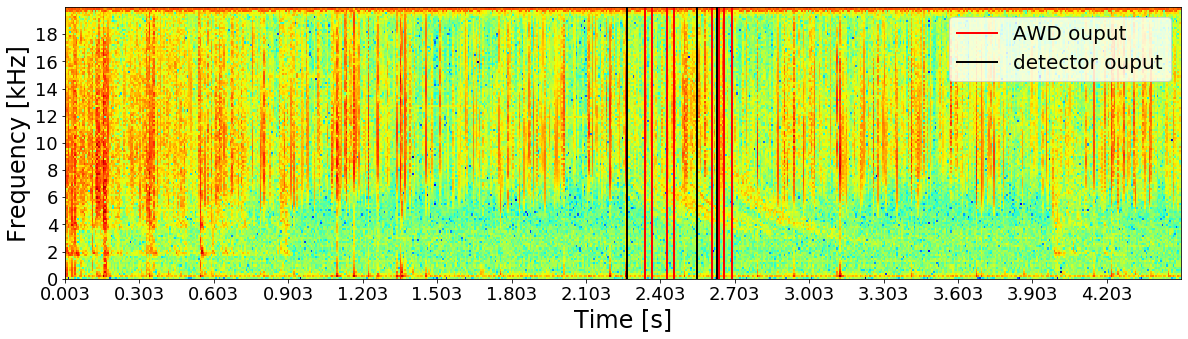

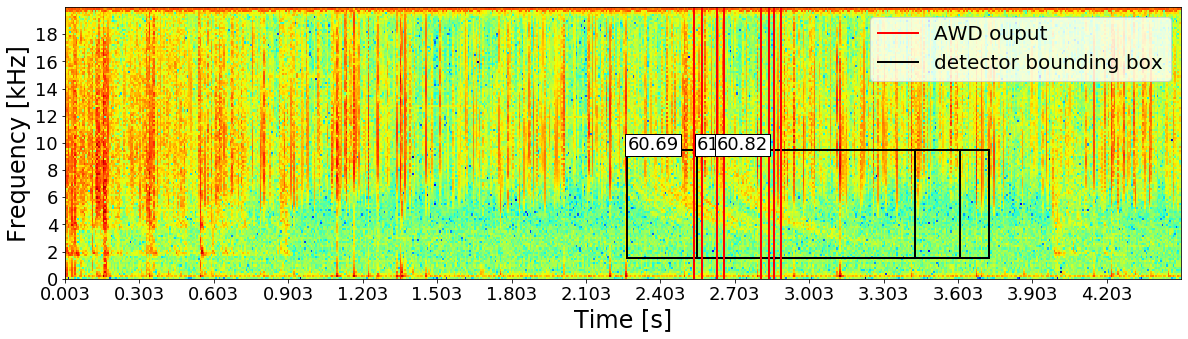

In [7]:
N,G,k,T1,T2,pfa = 10,7,9,3,8,3.36e-01
file = np.random.choice(files)
file = '2013-07-19UT04:14:42.00291922.marion.vr2'
sample = CFARDetector(dataset_loc, site, file)
transforms, transforms_params = ['slice','zscore','scale'], [[1.5,9.5],[None],[0,1]]
kernel = sample.load_kernel('sim', [0.35,80,1])
print(file)
output = [o[0] for o in sample.detection_starting_locations_final(transforms,transforms_params, kernel, 'fusion_cfar', [N,G,k,T1,T2,pfa], threshold=0, time_err=2)]
print(output)
awd_output = [awd[0] for awd in sample.awda_whistlers(time_err=2)[0]]
print(awd_output)
bboxes = sample.detection_bounding_boxes(transforms,transforms_params, kernel, 'fusion_cfar', [N,G,k,T1,T2,pfa], threshold=0, time_err=2, duration=True)
freq_size = 4
sample.spectrogram_with_axis(log10=True)
sample.set_figsize(freq_size*sample.get_time_freq_ratio(dec=0), freq_size)
plt.figure(figsize=(sample.get_figsize()[0],5))
for a in awd_output:
    plt.axvline(a-0.2, color='r', linewidth=font[-1])
for o in output:
    plt.axvline(o, color='k', linewidth=font[-1])
plt.pcolormesh(sample.get_time(),sample.get_freq(),sample.get_spectrogram(), cmap='jet')
plt.xticks(np.arange(sample.get_time()[0], sample.get_time()[-1], .3), fontsize=font[3])
plt.yticks(np.arange(sample.get_freq()[0], sample.get_freq()[-1], 2), fontsize=font[3])
legend = [Line2D([0], [0], color='r', lw=font[-1], label='AWD ouput'),
          Line2D([0], [0], color='k', lw=font[-1], label='detector ouput')]
plt.legend(handles=legend,fontsize=font[1])
plt.xlabel('Time [s]', fontsize=font[2])
plt.ylabel('Frequency [kHz]', fontsize=font[2])
plt.show()

plt.figure(figsize=(sample.get_figsize()[0],5))
for a in awd_output:
    plt.axvline(a, color='r', linewidth=font[-1])
for bbox in bboxes:
    c,x1,x2,y1,y2 = bbox
    color = 'k'
    rect = Rectangle((x1,y1), x2-x1, y2-y1, linewidth=font[-1], edgecolor=color, facecolor='none')
    plt.text(x1,y2,'%.2f'%c, fontsize=font[-2], bbox={'facecolor':'white', 'pad':2, 'ec':color})
    plt.gca().add_patch(rect)
plt.pcolormesh(sample.get_time(),sample.get_freq(),sample.get_spectrogram(), cmap='jet')
plt.xticks(np.arange(sample.get_time()[0], sample.get_time()[-1], .3), fontsize=font[3])
plt.yticks(np.arange(sample.get_freq()[0], sample.get_freq()[-1], 2), fontsize=font[3])
legend = [Line2D([0], [0], color='r', lw=font[-1], label='AWD ouput'),
          Line2D([0], [0], color='k', lw=font[-1], label='detector bounding box')]
plt.legend(handles=legend,fontsize=font[1])
plt.xlabel('Time [s]', fontsize=font[2])
plt.ylabel('Frequency [kHz]', fontsize=font[2])
plt.show()

In [ ]:
2013-07-11UT00:54:42.92451938.marion.vr2
2013-07-11UT01:11:03.86531938.marion.vr2
        2013-06-27UT22:04:56.58211922.marion.vr2

In [ ]:
n = 200
f_min, f_max = 1.5, 9.5
N,G,k,Ts,Tl,X_dB = 10,7,0,0,0,0.5

for N in [8,10,12,15]:
    for G in [5,7,10]:
        for X_dB in [0.4,0.5,0.6,0.7]:
            cfar_detector_gen.dataset_cross_correlation_gen(transforms='zscore', transforms_params=None, f_min=f_min, f_max=f_max, 
                                           An=0.35, D0=80, magnitude=1, N=N, G=G, k=k, Ts=Ts, Tl=Tl, X_dB=X_dB,
                                           train=True, n=n)
x_axis = []
recall, precision, f1_score = [],[],[]
results = {}
for X_dB in [0.4,0.5,0.6,0.7]:
    for G in [5,7,10]:
        for N in [8,10,12,15]:
#             print([N,G,X_dB])
            data = cfar_detector_gen.dataset_cross_correlation_load(transforms='zscore', transforms_params=None, f_min=f_min, f_max=f_max, 
                                           An=0.35, D0=80, magnitude=1, N=N, G=G, k=k, Ts=Ts, Tl=Tl, X_dB=X_dB,
                                           train=True, n=n)
            confusion_matrix = data['confusion matrix']
            x_axis.append([X_dB,G,N])
            results[str([X_dB,G,N])]=confusion_matrix
#             print(confusion_matrix)
            performance = cfar_detector_gen.performance(confusion_matrix)
            recall.append(performance['recall'])
            precision.append(performance['precision'])
            f1_score.append(performance['f1 score'])
#             print(performance)
plt.figure(figsize=(20,6))
plt.plot(precision,linewidth=font[-1])
plt.plot(recall,linewidth=font[-1])
plt.plot(f1_score,linewidth=font[-1])
plt.xticks(list(range(len(x_axis))),x_axis, rotation='vertical', fontsize=font[3])
plt.yticks(fontsize=font[3])
plt.legend(['precision','recall','f1 score'], fontsize=font[1])
plt.grid(True)
plt.show()
print(results[str([0.6,10,15])])
print(results[str([0.7,7,15])])
print(results[str([0.7,10,15])])

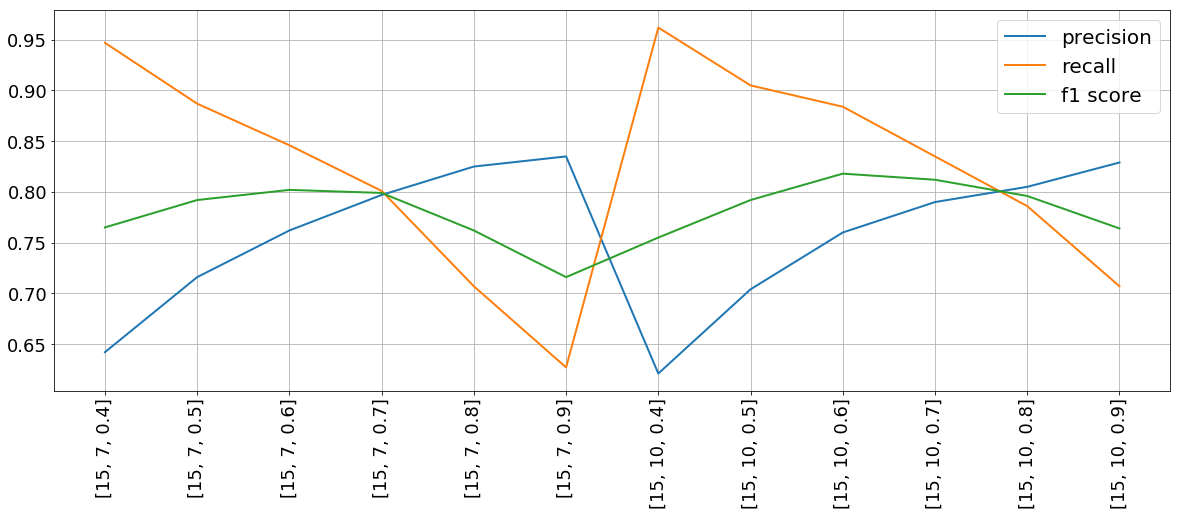

In [21]:
n = 200
f_min, f_max = 1.5, 9.5
N,G,k,Ts,Tl,X_dB = 15,10,9,0,0,0.5

# for N in [15]:
#     for G in [7,10]:
#         for X_dB in [0.4,0.5,0.6,0.7,0.8,0.9]:
#             cfar_detector_gen.dataset_cross_correlation_gen(transforms='zscore', transforms_params=None, f_min=f_min, f_max=f_max, 
#                                            An=0.35, D0=80, magnitude=1, N=N, G=G, k=k, Ts=Ts, Tl=Tl, X_dB=X_dB,
#                                            train=True, n=n)
x_axis = []
recall, precision, f1_score = [],[],[]
for N in [15]:
    for G in [7,10]:
        for X_dB in [0.4,0.5,0.6,0.7,0.8,0.9]:
            x_axis.append([N,G,X_dB])
            data = cfar_detector_gen.dataset_cross_correlation_load(transforms='zscore', transforms_params=None, f_min=f_min, f_max=f_max, 
                                           An=0.35, D0=80, magnitude=1, N=N, G=G, k=k, Ts=Ts, Tl=Tl, X_dB=X_dB,
                                           train=True, n=n)
            confusion_matrix = data['confusion matrix']
            performance = cfar_detector_gen.performance(confusion_matrix)
            recall.append(performance['recall'])
            precision.append(performance['precision'])
            f1_score.append(performance['f1 score'])

plt.figure(figsize=(20,7))
plt.plot(precision,linewidth=font[-1])
plt.plot(recall,linewidth=font[-1])
plt.plot(f1_score,linewidth=font[-1])
plt.xticks(list(range(len(x_axis))),x_axis, rotation='vertical', fontsize=font[3])
plt.yticks(fontsize=font[3])
plt.legend(['precision','recall','f1 score'], fontsize=font[1])
plt.grid(True)
plt.show()

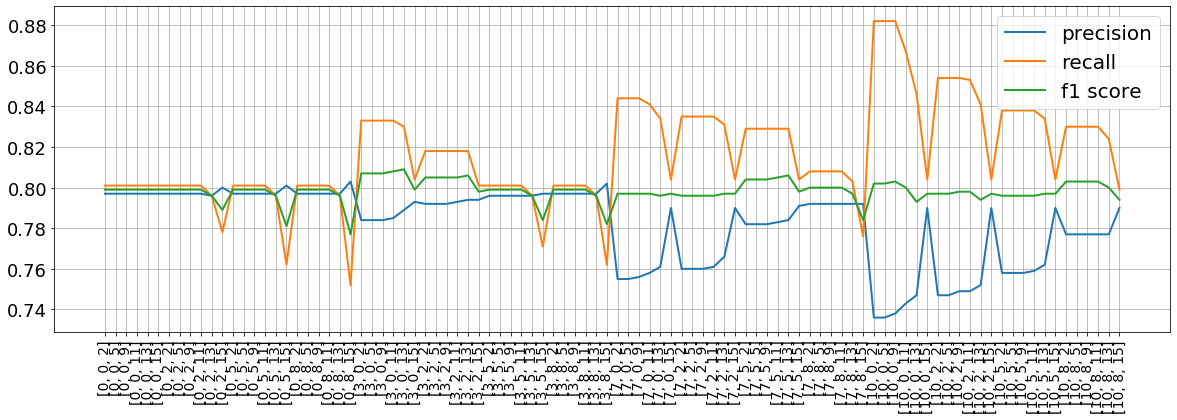

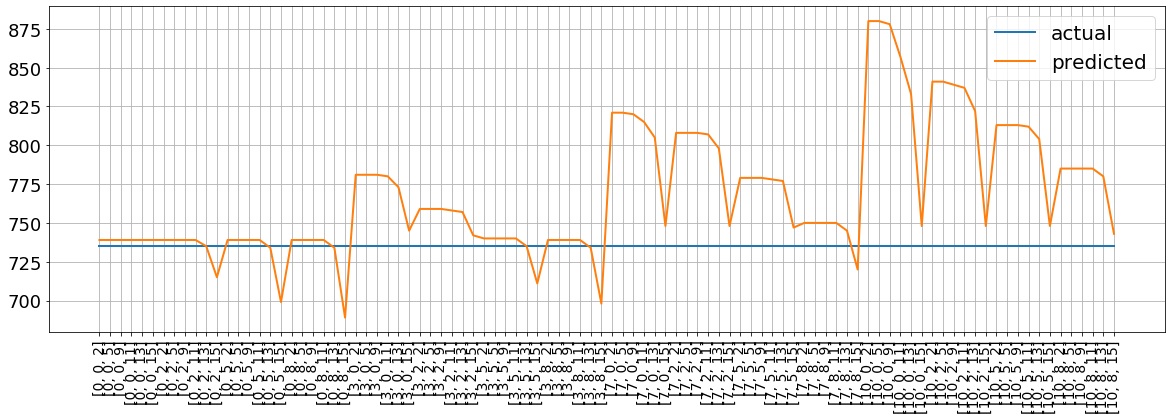

In [2]:
n = 200
f_min, f_max = 1.5, 9.5
N,G,k,Ts,Tl,X_dB = 15,7,9,0,0,0.7

# for k in [2, 5,9,11,13,15]:
#     for Ts in [0,2,5,8]:
#         for Tl in [0,3,7,10]:
#             cfar_detector_gen.dataset_cross_correlation_gen(transforms='zscore', transforms_params=None, f_min=f_min, f_max=f_max, 
#                                            An=0.35, D0=80, magnitude=1, N=N, G=G, k=k, Ts=Ts, Tl=Tl, X_dB=X_dB,
#                                            train=True, n=n)
x_axis = []
recall, precision, f1_score = [],[],[]
actual, predicted = [],[]
for Tl in [0,3,7,10]:
    for Ts in [0,2,5,8]:
        for k in [2, 5,9,11,13,15]:
            x_axis.append([Tl,Ts,k])
            data = cfar_detector_gen.dataset_cross_correlation_load(transforms='zscore', transforms_params=None, f_min=f_min, f_max=f_max, 
                                           An=0.35, D0=80, magnitude=1, N=N, G=G, k=k, Ts=Ts, Tl=Tl, X_dB=X_dB,
                                           train=True, n=n)
            confusion_matrix = data['confusion matrix']
            actual.append(confusion_matrix[0]+confusion_matrix[2])
            predicted.append(confusion_matrix[0]+confusion_matrix[1])
            performance = cfar_detector_gen.performance(confusion_matrix)
            recall.append(performance['recall'])
            precision.append(performance['precision'])
            f1_score.append(performance['f1 score'])

plt.figure(figsize=(20,6))
plt.plot(precision,linewidth=font[-1])
plt.plot(recall,linewidth=font[-1])
plt.plot(f1_score,linewidth=font[-1])
plt.xticks(list(range(len(x_axis))),x_axis, rotation='vertical', fontsize=font[3]-4)
plt.yticks(fontsize=font[3])
plt.legend(['precision','recall','f1 score'], fontsize=font[1])
plt.grid(True)
plt.show()
plt.figure(figsize=(20,6))
plt.plot(actual,linewidth=font[-1])
plt.plot(predicted,linewidth=font[-1])
plt.xticks(list(range(len(x_axis))),x_axis, rotation='vertical', fontsize=font[3]-4)
plt.yticks(fontsize=font[3])
plt.legend(['actual','predicted'], fontsize=font[1])
plt.grid(True)
plt.show()

In [2]:
n = 200
f_min, f_max = 1.5, 9.5
N,G,k,Ts,Tl,X_dB = 10,7,9,3,8,0.5

cfar_detector_gen.dataset_cross_correlation_gen(transforms='zscore', transforms_params=None, f_min=f_min, f_max=f_max, 
                                           An=0.35, D0=80, magnitude=1, N=N, G=G, k=k, Ts=Ts, Tl=Tl, X_dB=X_dB,
                                           train=True, n=n)
data = cfar_detector_gen.dataset_cross_correlation_load(transforms='zscore', transforms_params=None, f_min=f_min, f_max=f_max, 
                                           An=0.35, D0=80, magnitude=1, N=N, G=G, k=k, Ts=Ts, Tl=Tl, X_dB=X_dB,
                                           train=True, n=n)
confusion_matrix = data['confusion matrix']
performance = cfar_detector_gen.performance(confusion_matrix)
print(confusion_matrix)
print(performance)
data['results']

100%|██████████| 200/200 [00:50<00:00,  3.95it/s]


[675, 360, 60, 0]
{'recall': 0.918, 'precision': 0.652, 'f1 score': 0.763, 'g measure': 0.774, 'false alarm': 0.348, 'misdetection': 0.082}


{'2013-07-10UT22:51:09.06211938.marion.vr2': [[2.0, 2.2, 2.3], [], [0.3], []],
 '2013-06-28UT01:05:06.84771922.marion.vr2': [[0.0,
   0.1,
   0.2,
   0.3,
   0.4,
   2.2,
   2.3],
  [1.3, 2.0, 2.1],
  [],
  []],
 '2013-10-08UT00:03:09.39699422.marion.vr2': [[2.2, 2.3, 2.6], [], [], []],
 '2013-07-02UT16:36:17.87491914.marion.vr2': [[0.7, 0.9, 2.2, 2.3, 2.4],
  [0.6, 2.0, 2.1],
  [],
  []],
 '2013-07-11UT01:19:10.57251938.marion.vr2': [[], [], [0.3, 2.2], []],
 '2013-07-04UT18:49:09.30531930.marion.vr2': [[2.3, 2.4], [2.2], [], []],
 '2013-07-27UT16:48:30.34211914.marion.vr2': [[4.2, 4.3, 4.5], [], [], []],
 '2013-07-07UT14:48:18.20771914.marion.vr2': [[2.2, 2.7, 5.0, 5.1],
  [2.6, 5.4],
  [],
  []],
 '2013-07-04UT15:48:43.83331922.marion.vr2': [[2.3, 2.4, 2.5],
  [1.0, 2.2],
  [],
  []],
 '2013-06-25UT03:52:18.36131922.marion.vr2': [[1.7, 1.8, 2.2, 2.3],
  [1.5, 1.6, 2.1],
  [],
  []],
 '2013-06-28UT01:09:00.98531922.marion.vr2': [[2.2, 2.3, 2.4], [2.1], [], []],
 '2013-07-02UT14:26:13